Machine Intelligence 2 - Exercise 5 - Infomax Algorithm

Group : Poulami Ghosh, Julie Morgan, Bramantyo Supriyatno 

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.io.wavfile
import seaborn as sns

sns.set(style="ticks", context="paper", palette="pastel")
plt.style.use('seaborn')

Exercise H5.1 Initialization

In [ ]:
sound1 = np.loadtxt('sound1.dat')
sound2 = np.loadtxt('sound2.dat')

sounds = np.vstack((sound1, sound2)).T

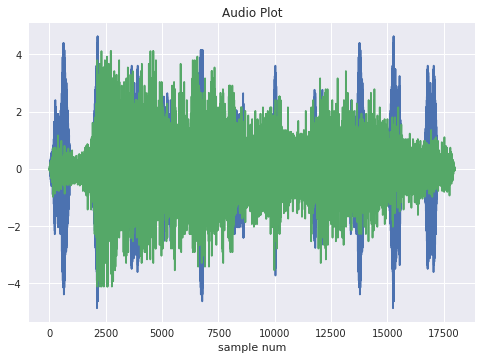

In [ ]:
plt.plot(sounds)
plt.title('Audio Plot')
plt.xlabel('sample num')
plt.show()

In [ ]:
while True:
    A = np.random.random((2,2))
    if np.isfinite(np.linalg.cond(A)):
        break

In [ ]:
x_sounds = sounds @ A

In [ ]:
order = np.random.permutation(x_sounds.shape[0])
p_sounds = x_sounds[order,:]

In [ ]:
cov_s1p1 = np.cov(sound1,p_sounds[:,0])[0,1]
cov_s1p2 = np.cov(sound1,p_sounds[:,1])[0,1]
cov_s2p1 = np.cov(sound2,p_sounds[:,0])[0,1]
cov_s2p2 = np.cov(sound2,p_sounds[:,1])[0,1]

In [ ]:
std_s1 = np.std(sound1)
std_s2 = np.std(sound2)
std_p1 = np.std(p_sounds[:,0])
std_p2 = np.std(p_sounds[:,1])

In [ ]:
a = cov_s1p1/(std_s1*std_p1)
b = cov_s1p2/(std_s1*std_p2)
c = cov_s2p1/(std_s2*std_p1)
d = cov_s2p2/(std_s2*std_p2)

In [ ]:

print('correlation of true sound 1 and mixed permutated sound 1 = {}'.format(a))
print('correlation of true sound 1 and mixed permutated sound 2 = {}'.format(b))
print('correlation of true sound 2 and mixed permutated sound 1 = {}'.format(c))
print('correlation of true sound 2 and mixed permutated sound 2 = {}'.format(d))

correlation of true sound 1 and mixed permutated sound 1 = -0.0020810946229855225
correlation of true sound 1 and mixed permutated sound 2 = -0.0023417829228215823
correlation of true sound 2 and mixed permutated sound 1 = 0.0043533005779326445
correlation of true sound 2 and mixed permutated sound 2 = 0.005571654713552426


In [ ]:
mean_x = np.mean(p_sounds)
mean_x

0.010974184271634456

In [ ]:
cp_sounds = p_sounds - mean_x

In [ ]:
np.mean(cp_sounds)

1.5000346643824336e-17

In [ ]:
W = np.random.random((2, 2))

Exercise 5.2 Optimization

In [ ]:
def logistic(x):
    return 1/(1+np.exp(-x))

def logistic_d2f_df(x):
    return 1 - 2 * logistic(x)

In [ ]:
W_inv = np.linalg.inv(W)

In [ ]:
def compute_error(x_alpha):
    for i in range(len(W)):
        for j in range(len(W[0])):
            W_inv[j,i] + logistic_d2f_df(np.sum(W[i,:]@x_alpha))

In [ ]:
def frob_norm(w1,w2):
    return float(np.sum((w1-w2)**2))

In [ ]:
def compute_del_W(weights, data):
    p = data.shape[1]
    inv_w = np.linalg.inv(weights)
    m = logistic_d2f_df(weights @ data)
    update = m @ data.T 
    return inv_w.T + update / p

In [ ]:
def compute_del_W_natural(weights, data):
    p = data.shape[1]
    m = logistic_d2f_df(weights @ data)
    update = (np.eye(p) + (m @ (weights @ data).T)) @ weights 
    return update

In [ ]:
def infomax_ica(init_W, data, lr = 1e-2, lr_scale=0.9999, num_epochs = 100, save_fnorm_count=1000):
    num_data = data.shape[1]
    num_features = data.shape[0]

    assert(num_features == init_W.shape[0])
    assert(num_features == init_W.shape[1])

    weights = init_W.copy()
    p_weights = init_W.copy()
    
    cur_lr = lr

    count = 0
    fnorm = []
    for epoch in range(num_epochs):
        #shuffling data
        #order = np.random.permutation(num_data)
        permuted = data[:,order]
        for alpha in range(num_data):
            sample = data[:,[alpha]]
            update = compute_del_W(weights, sample)
            weights += cur_lr * update
            cur_lr *= lr_scale

            count += 1
            if count >=save_fnorm_count:
                count = 0
                fnorm.append(frob_norm(p_weights, weights))
                p_weights = weights.copy()
    return weights, fnorm

In [ ]:
def infomax_ica_natural(init_W, data, lr = 1e-2, lr_scale=0.9999, num_epochs = 100, save_fnorm_count=1000):
    num_data = data.shape[1]
    num_features = data.shape[0]

    assert(num_features == init_W.shape[0])
    assert(num_features == init_W.shape[1])

    weights = init_W.copy()
    p_weights = init_W.copy()
    
    cur_lr = lr

    count = 0
    fnorm = []
    for epoch in range(num_epochs):
        #shuffling data
        #order = np.random.permutation(num_data)
        #permuted = data[:,order]
        for alpha in range(num_data):
            sample = data[:,[alpha]]
            update = compute_del_W_natural(weights, sample)
            weights += cur_lr * update
            cur_lr *= lr_scale

            count += 1
            if count >=save_fnorm_count:
                count = 0
                fnorm.append(frob_norm(p_weights, weights))
                p_weights = weights.copy()
    return weights, fnorm

In [ ]:
updated_w, norm = infomax_ica(W, p_sounds.T, lr=1e-2, num_epochs=10)
print(updated_w)

[[ -1.32256796   4.20435387]
 [  7.7481306  -10.17103661]]


In [ ]:
updated_w_n, norm_n = infomax_ica_natural(W, p_sounds.T, lr=1e-2, num_epochs=10)
print(updated_w_n)

[[1.13247219 0.918405  ]
 [1.36931936 0.58843281]]


In [ ]:
W

array([[0.61239292, 0.68592243],
       [0.45297251, 0.07951373]])

In [ ]:
target = np.linalg.inv(A)

In [ ]:
target

array([[ 11.02220435,  -2.70387357],
       [-14.8738433 ,   5.04193471]])

Exercise H5.3 Results

In [ ]:
recovered = updated_w @ x_sounds.T
recovered_n = updated_w_n @ x_sounds.T

In [ ]:
rec_sound1 = recovered[0,:]
# rec_sound1 /= np.max(rec_sound1)
rec_sound2 = recovered[1,:]
# rec_sound2 /= np.max(rec_sound2)

In [ ]:
rec_sound1n = recovered_n[0,:]
# rec_sound1n /= np.max(rec_sound1n)
rec_sound2n = recovered_n[1,:]
# rec_sound2n /= np.max(rec_sound2n)

In [ ]:
scipy.io.wavfile.write('recov_sound1.wav', 8192, rec_sound1)
scipy.io.wavfile.write('recov_sound2.wav', 8192, rec_sound2)

In [ ]:
scipy.io.wavfile.write('recovn_sound1.wav', 8192, rec_sound1)
scipy.io.wavfile.write('recovn_sound2.wav', 8192, rec_sound2)

In [ ]:
cov_s1p1 = np.cov(sound1,rec_sound1)[0,1]
cov_s1p2 = np.cov(sound1,rec_sound2)[0,1]
cov_s2p1 = np.cov(sound2,rec_sound1)[0,1]
cov_s2p2 = np.cov(sound2,rec_sound2)[0,1]

std_s1 = np.std(sound1)
std_s2 = np.std(sound2)
std_p1 = np.std(rec_sound1)
std_p2 = np.std(rec_sound2)

a2 = cov_s1p1/(std_s1*std_p1)
b2 = cov_s1p2/(std_s1*std_p2)
c2 = cov_s2p1/(std_s2*std_p1)
d2 = cov_s2p2/(std_s2*std_p2)

print('correlation of true sound 1 and recovered sound 1 = {}'.format(a2))
print('correlation of true sound 1 and recovered sound 2 = {}'.format(b2))
print('correlation of true sound 2 and recovered sound 1 = {}'.format(c2))
print('correlation of true sound 2 and recovered sound 2 = {}'.format(d2))

correlation of true sound 1 and recovered sound 1 = 0.17470835546242988
correlation of true sound 1 and recovered sound 2 = 0.9651722487947253
correlation of true sound 2 and recovered sound 1 = 0.984896072622358
correlation of true sound 2 and recovered sound 2 = 0.26304381222432044


In [ ]:
cov_s1p1 = np.cov(sound1,rec_sound1n)[0,1]
cov_s1p2 = np.cov(sound1,rec_sound2n)[0,1]
cov_s2p1 = np.cov(sound2,rec_sound1n)[0,1]
cov_s2p2 = np.cov(sound2,rec_sound2n)[0,1]

std_s1 = np.std(sound1)
std_s2 = np.std(sound2)
std_p1 = np.std(rec_sound1n)
std_p2 = np.std(rec_sound2n)

a2 = cov_s1p1/(std_s1*std_p1)
b2 = cov_s1p2/(std_s1*std_p2)
c2 = cov_s2p1/(std_s2*std_p1)
d2 = cov_s2p2/(std_s2*std_p2)

print('correlation of true sound 1 and recovered sound 1 (natural) = {}'.format(a2))
print('correlation of true sound 1 and recovered sound 2 (natural) = {}'.format(b2))
print('correlation of true sound 2 and recovered sound 1 (natural) = {}'.format(c2))
print('correlation of true sound 2 and recovered sound 2 (natural) = {}'.format(d2))

correlation of true sound 1 and recovered sound 1 (natural) = 0.291736170133636
correlation of true sound 1 and recovered sound 2 (natural) = 0.302646753868447
correlation of true sound 2 and recovered sound 1 (natural) = 0.9569238562147897
correlation of true sound 2 and recovered sound 2 (natural) = 0.9535417873909134


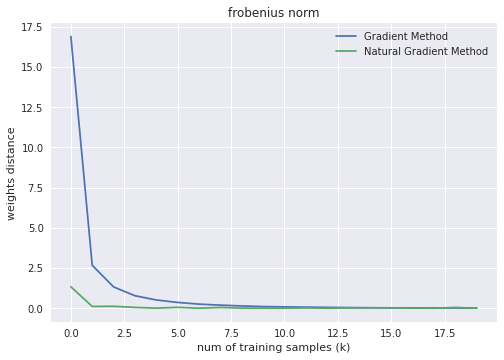

In [ ]:
plt.plot(norm[:20], label='Gradient Method')
plt.plot(norm_n[:20], label='Natural Gradient Method')
plt.title('frobenius norm')
plt.xlabel('num of training samples (k)')
plt.ylabel('weights distance')
plt.legend()
plt.show()

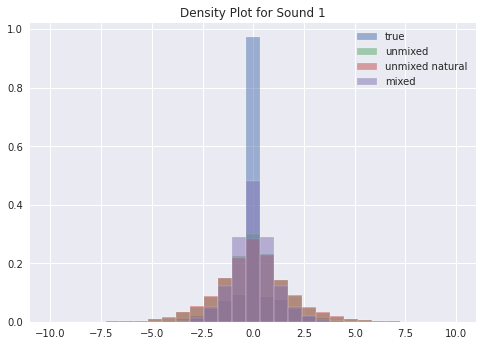

In [ ]:
bins = np.linspace(-10,10,30)

plt.hist(sound1, bins, density=True, alpha=0.5, label='true')
plt.hist(rec_sound1, bins, density=True, alpha=0.5, label='unmixed')
plt.hist(rec_sound1n, bins, density=True, alpha=0.5, label='unmixed natural')
plt.hist(x_sounds[:,0], bins, density=True, alpha=0.5, label='mixed')

plt.title('Density Plot for Sound 1')
plt.legend()
plt.show()

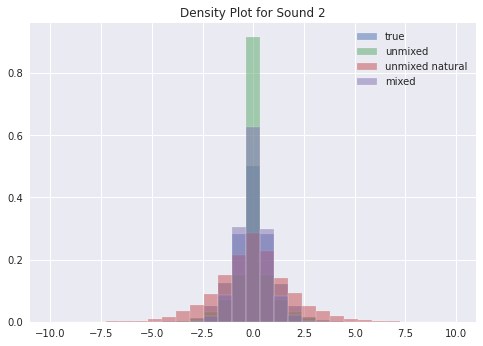

In [ ]:
plt.hist(sound2, bins, density=True, alpha=0.5, label='true')
plt.hist(rec_sound2, bins, density=True, alpha=0.5, label='unmixed')
plt.hist(rec_sound2n, bins, density=True, alpha=0.5, label='unmixed natural')
plt.hist(x_sounds[:,1], bins, density=True, alpha=0.5, label='mixed')

plt.title('Density Plot for Sound 2')
plt.legend()
plt.show()

The Infomax algorithm seems to produce a more distributed density. It also seems that infomax with gradient produce the sama distribution compared to infomax with natural gradient.  

The natural gradient seems to be faster thatn the gradient method since it does not require computing inverse matrix of the weights. 

Looking at the weights updated by the algorithm, the gradient method seems to be more similar to the target weights. The correlation values are telling the same things. However judging by ear, both methods seem to perform adequately good. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b23642c4-be61-4004-beb2-279e5be696f6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>